In [1]:
%load_ext autoreload
%autoreload 2

import traceback
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from make_line_on_xray import get_xray

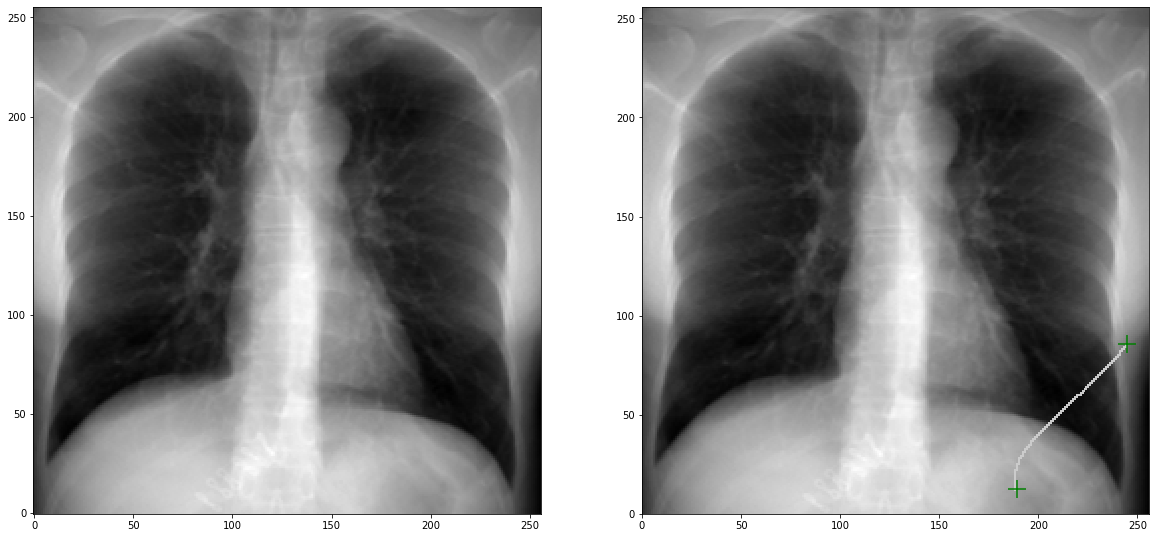

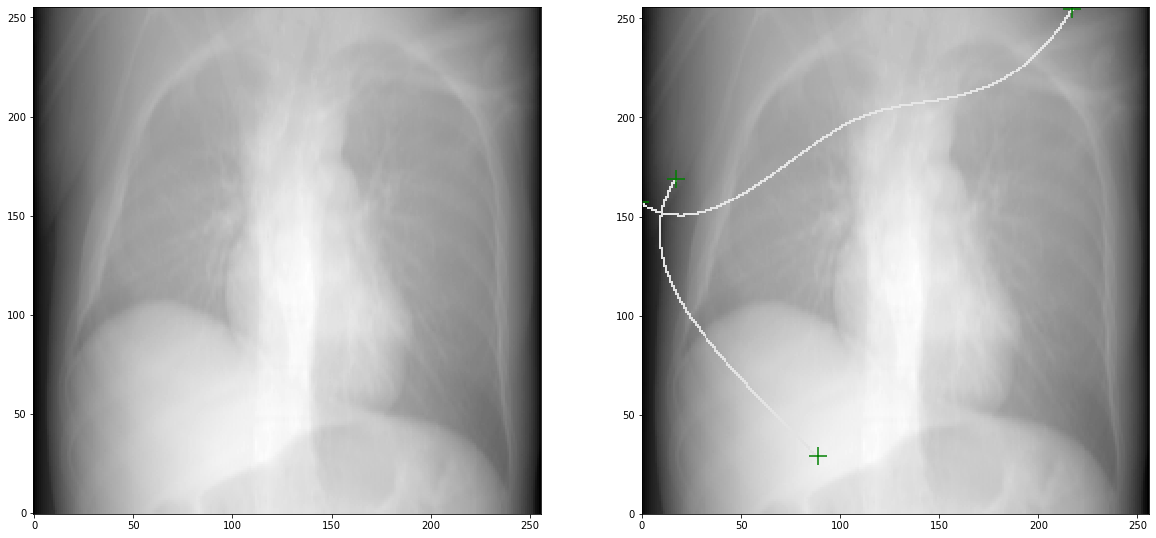

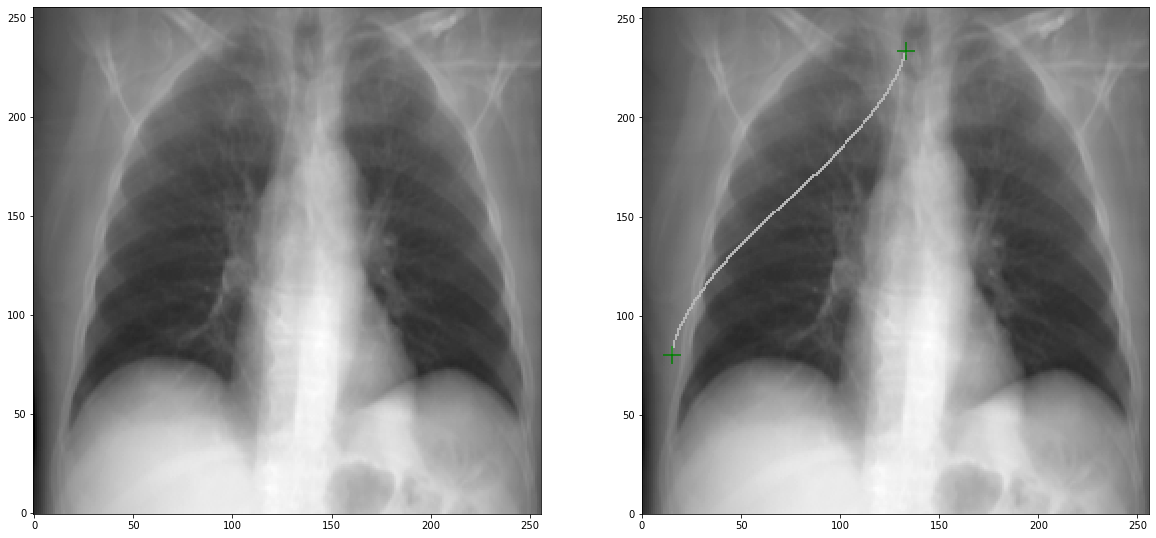

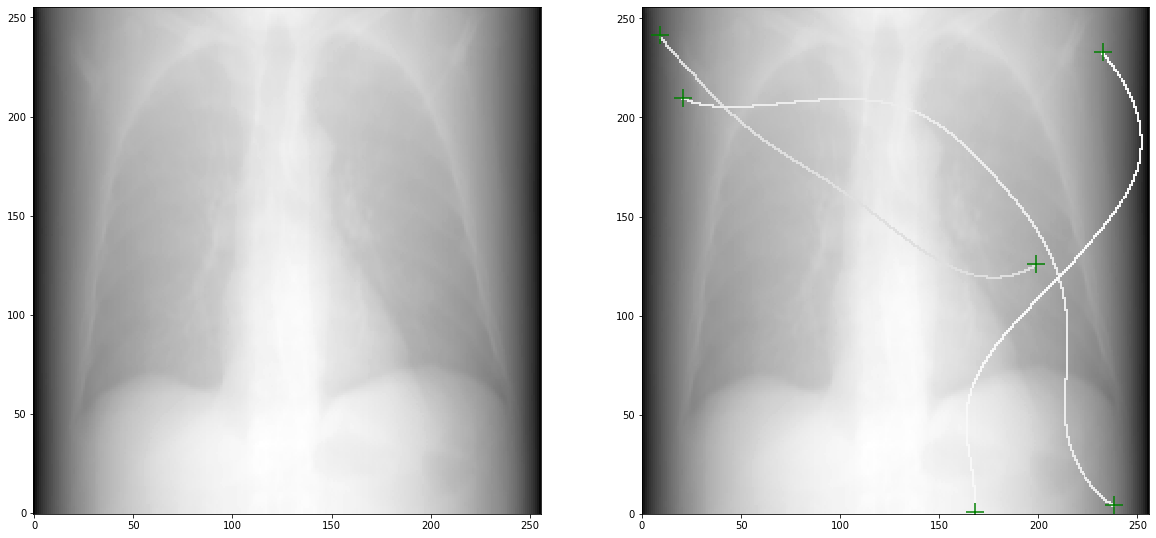

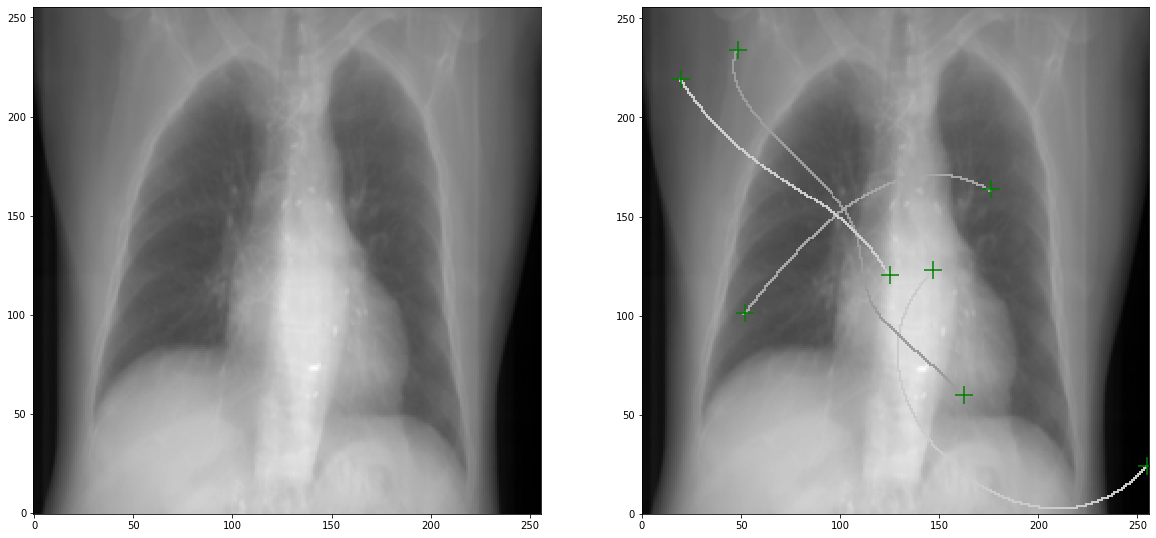

In [4]:
for n in range(5):
    try:
        xray, container = get_xray(isplot=True,fignum=n)
    except:
        pass
        traceback.print_exc()